In [13]:
import pandas as pd
import numpy as np
# import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [6]:
!pip install pandas numpy scikit-learn Flask


  Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached flask-3.0.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.7.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl (10.6 MB)
Using cached flask-3.0.2-py3-none-any.whl (101 kB)
Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
Using cached

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\flask.exe' -> 'C:\\Python312\\Scripts\\flask.exe.deleteme'



In [14]:
#loading dataset
df=pd.read_csv("customer_churn.csv")

df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# DataCleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


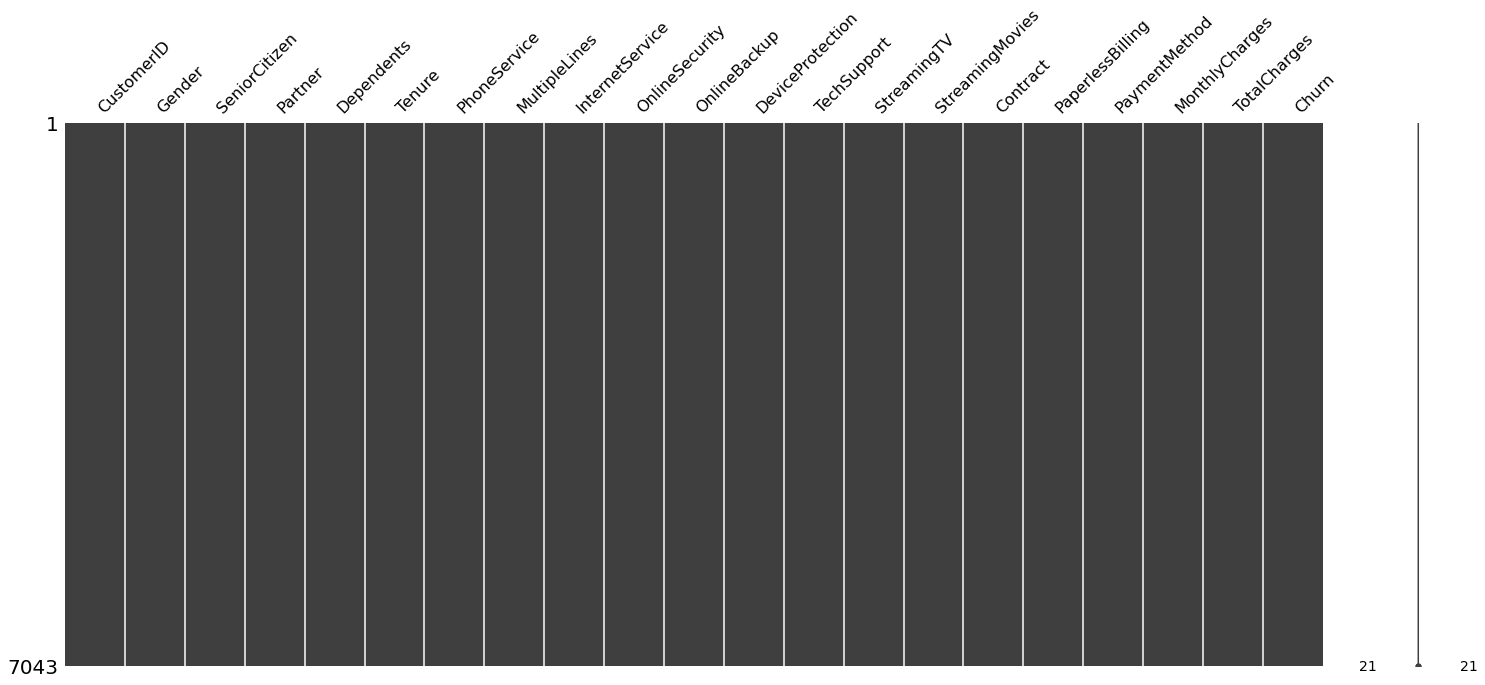

In [4]:
# Visualize missing values as a matrix
# msno.matrix(df);

In [16]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting the "TotalCharges" column in the pandas DataFrame "df" to a numeric data type and replaces any non-numeric values with NaN.


In [17]:
#we can see that TotelCharges Nan when Tenure is 0
df[np.isnan(df['TotalCharges'])]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
df.drop(labels=df[df['Tenure'] == 0].index, axis=0, inplace=True)

removing the rows that contain missing values since they account for less than 5% of the data.

In [19]:
# maps the numeric values of 0 and 1 in the "SeniorCitizen" column of a pandas DataFrame to string values of "No" and "Yes", respectively, making the data more interpretable and easier to analyze.
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

Quickly understanding the distribution of categorical data in the "InternetService" column, including the number of unique categories and the most common values.


In [21]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


summary of the three columns - 'Tenure', 'MonthlyCharges', and 'TotalCharges'


# EDA Visualizations

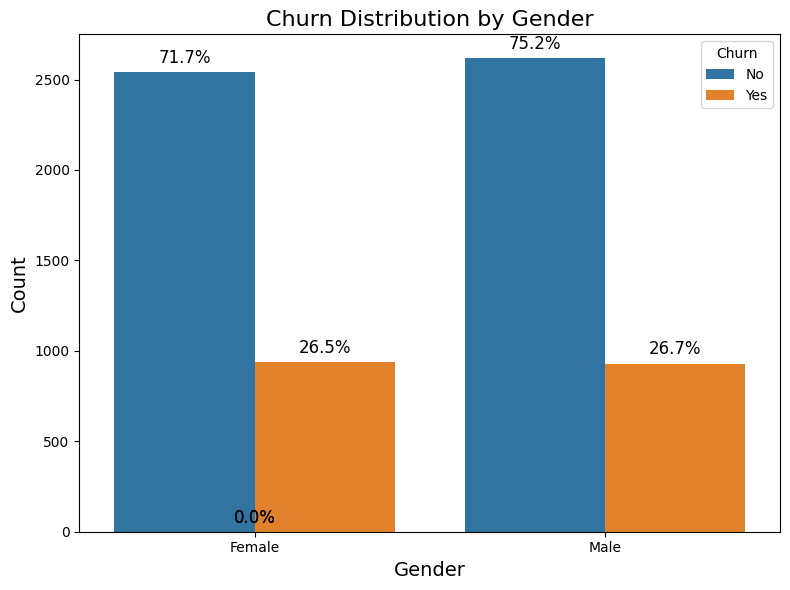

In [23]:
# Churn distribution by Gender

gender_churn = df.groupby(['Gender', 'Churn']).size().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='Gender', y='Count', hue='Churn', data=gender_churn, ax=ax)
ax.set_title('Churn Distribution by Gender', fontsize=16)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Show percentage on top of bars
total_male = float(gender_churn[gender_churn['Gender']=='Male']['Count'].sum())
total_female = float(gender_churn[gender_churn['Gender']=='Female']['Count'].sum())
for p in ax.patches:
    height = p.get_height()
    if p.get_x() < 0.5: 
        ax.text(p.get_x()+p.get_width()/2.,
                height + 50,
                '{:.1f}%'.format((height/total_male)*100),
                ha="center",
                fontsize=12)
    else:  
        ax.text(p.get_x()+p.get_width()/2.,
                height + 50,
                '{:.1f}%'.format((height/total_female)*100),
                ha="center",
                fontsize=12)

plt.tight_layout()


plt.show()


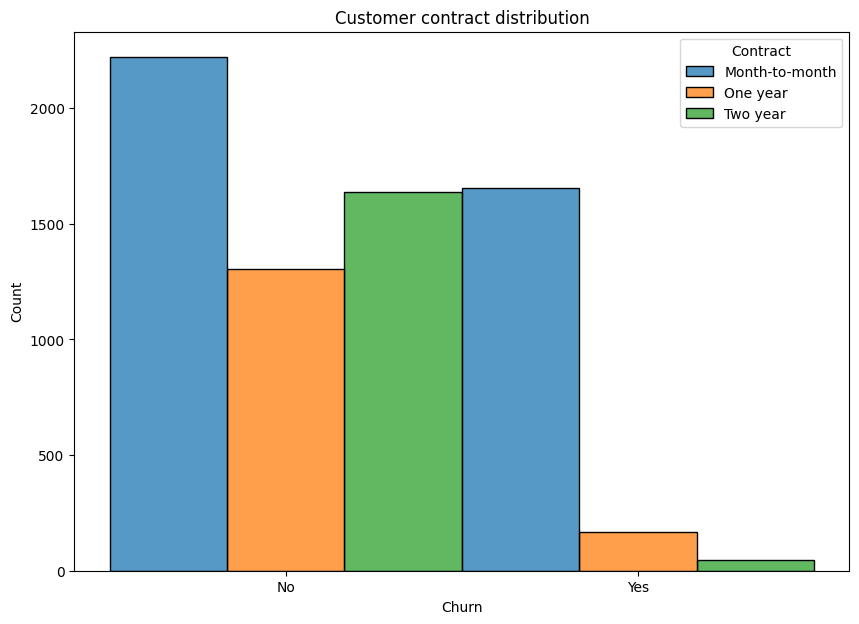

In [24]:
#Customer contract distribution
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x="Churn", hue="Contract", multiple="dodge")
plt.title("Customer contract distribution")

plt.show()

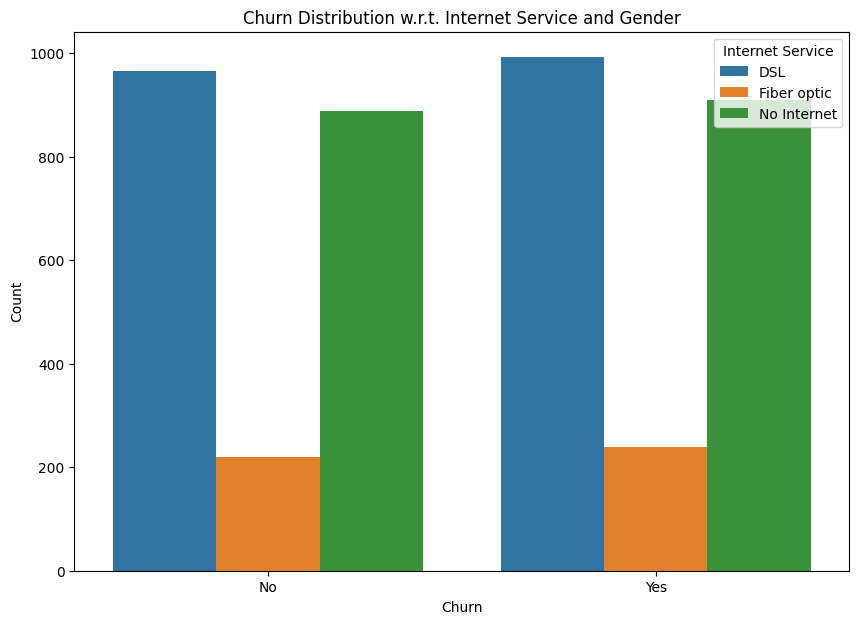

In [25]:
#Churn Distribution w.r.t. Internet Service and Gender
data = {
    'Internet Service': ['DSL', 'DSL', 'Fiber optic', 'Fiber optic', 'No Internet', 'No Internet'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Count': [965, 992, 219, 240, 889, 910]
}
plt.figure(figsize=(10, 7))

sns.barplot(data=data, x='Churn', y='Count', hue='Internet Service', hue_order=['DSL', 'Fiber optic', 'No Internet'])
plt.title("Churn Distribution w.r.t. Internet Service and Gender")
plt.show()

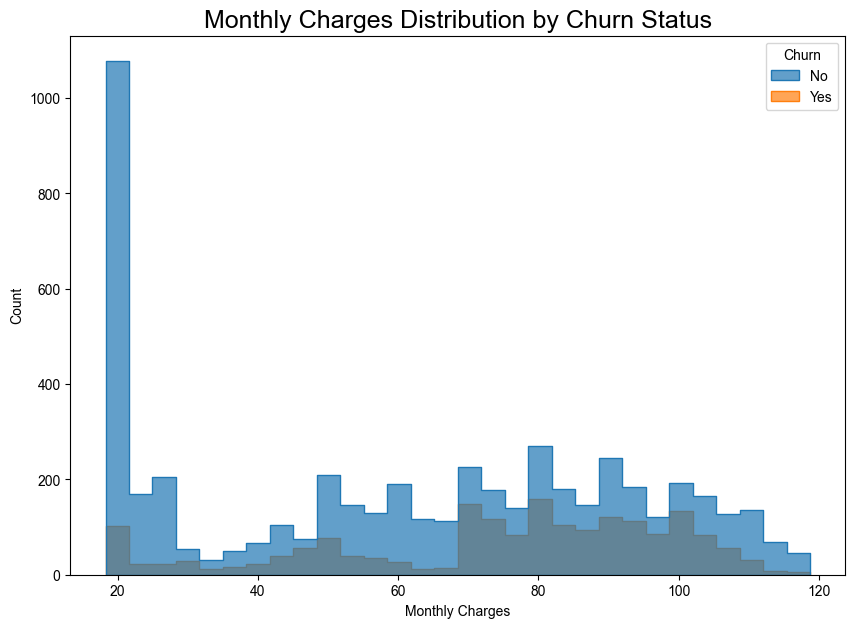

In [26]:
#Monthly Charges Distribution by Churn Status
plt.figure(figsize=(10, 7))

sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30,
             element="step", stat="count", common_norm=False,
             alpha=0.7)
sns.set_style("whitegrid")
sns.set_palette("Dark2")
sns.set_context("talk")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.title("Monthly Charges Distribution by Churn Status")
plt.show()


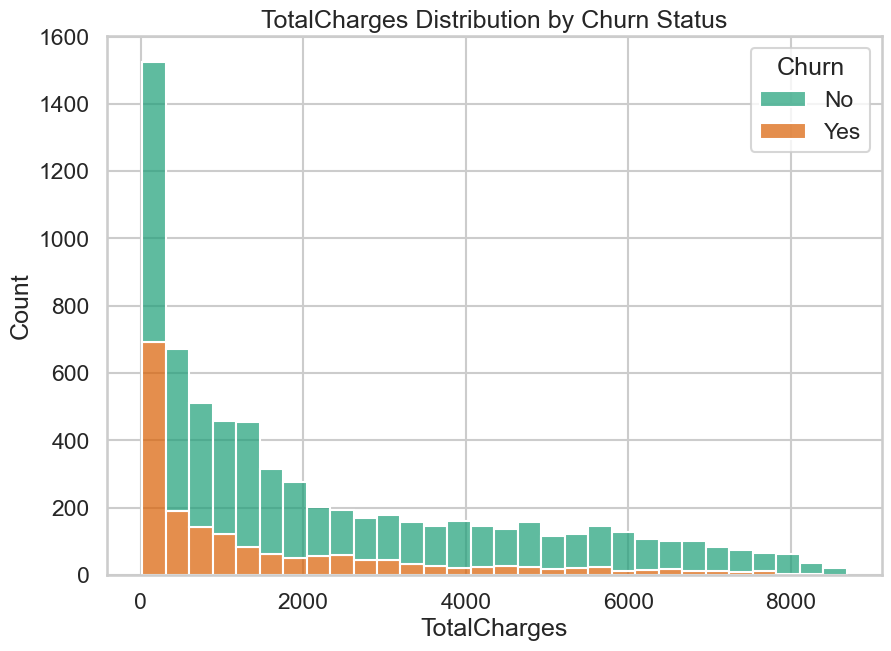

In [27]:
#TotalCharges Distribution by Churn Status
plt.figure(figsize=(10, 7))

sns.histplot(data=df, x="TotalCharges", hue="Churn", bins=30, multiple="stack",
             stat="count", alpha=0.7)
sns.set_style("whitegrid")
sns.set_palette("Dark2")
plt.title("TotalCharges Distribution by Churn Status")
plt.xlabel("TotalCharges")
plt.ylabel("Count")
plt.show()


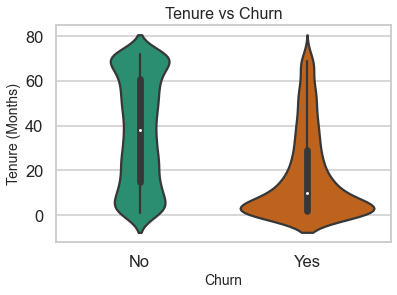

In [16]:
#Tenure vs Churn
sns.set_style("whitegrid")
sns.set_palette("Dark2")
# Creating a violin plot using Seaborn, with "Churn" on the x-axis, "Tenure" on the y-axis, and
sns.violinplot(x="Churn", y="Tenure", data=df, split=True)
plt.title("Tenure vs Churn", fontsize=16)
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Tenure (Months)", fontsize=14)
plt.show()

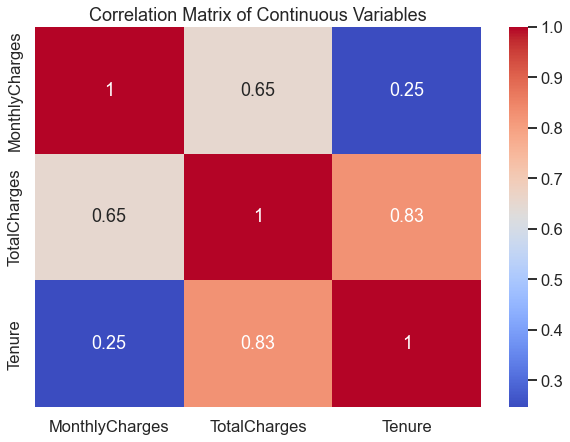

In [17]:
#Correlation Matrix of Continuous Variables
corr_matrix = df[["MonthlyCharges", "TotalCharges", "Tenure"]].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Continuous Variables")
plt.show()



# Preprocessing and modelling

In [18]:
#converting the categorical values into numerical values
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [19]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn'].values


In [21]:
#spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [22]:
scaler= StandardScaler()
num_cols = ["Tenure", 'MonthlyCharges', 'TotalCharges']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

scaling the numerical columns in the training and testing data using StandardScaler to standardize the data and make it ready for machine learning algorithm.


In [23]:
dt_model = DecisionTreeClassifier(random_state = 123)

params = {'max_depth':[3, 5, 7, 9],
          'splitter':['best', 'random'],
          'criterion':['gini', 'entropy']}

grid_search = GridSearchCV(estimator = dt_model, param_grid = params, cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

dt_model = DecisionTreeClassifier(max_depth = best_params['max_depth'], random_state = 123, splitter = best_params['splitter'], criterion = best_params['criterion'])
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)

print("Decision Tree accuracy is :",accuracy_dt)


Decision Tree accuracy is : 0.7895734597156399


Performing a grid search using cross-validation to find the best hyperparameters for a Decision Tree Classifier model, and then trains and evaluates the model with the best hyperparameters. The one-liner comment could be: "Grid search for best hyperparameters and training of a Decision Tree Classifier model with those hyperparameters to obtain accuracy on test data.

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1549
           1       0.67      0.41      0.51       561

    accuracy                           0.79      2110
   macro avg       0.74      0.67      0.69      2110
weighted avg       0.77      0.79      0.77      2110

ROC AUC: 0.8295858750801218


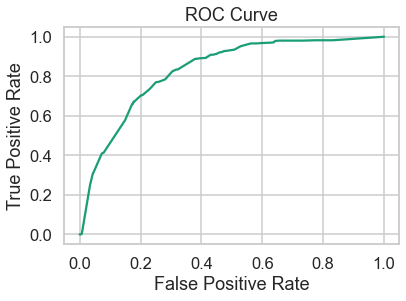

In [24]:

y_pred = dt_model.predict(X_test)

y_prob = dt_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC AUC:', roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Generating predictions on the test set using a Decision Tree model and calculates the classification report and ROC AUC score. It then plots the ROC curve using matplotlib.

"In addition to ROC AUC score, precision and recall are also commonly used metrics to assess model accuracy. Precision measures the proportion of true positives (correctly predicted positive samples) over the total number of positive samples predicted by the model. Recall measures the proportion of true positives over the total number of actual positive samples."

"F1-score is particularly useful when the dataset is imbalanced, as it provides a better measure of performance than accuracy. In imbalanced datasets, where the number of examples in one class is much greater than in the other class, accuracy can be misleading since a model that predicts only the majority class can have high accuracy. The F1-score takes into account both precision and recall, which are better measures of performance in such datasets."

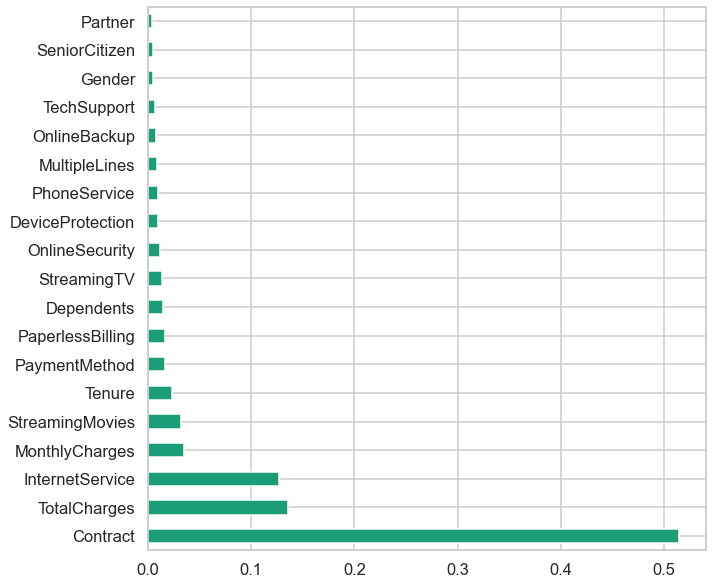

In [25]:
# Get Feature Importance from the classifier
feature_importance = dt_model.feature_importances_

# Plot the feature importances
feat_importances = pd.Series(feature_importance, index=X.columns)
feat_importances = feat_importances.nlargest(19)
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh')
plt.show()

Plotting a bar chart of the feature importances of a decision tree classifier.

# Balancing DataSet(Bounus)

In [26]:

print("Before oversampling:", Counter(y))

#Balance the dataset using RandomOverSampler

oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

print("After oversampling:", Counter(y_resampled))

Before oversampling: Counter({0: 5163, 1: 1869})
After oversampling: Counter({0: 5163, 1: 5163})


balancing the class distribution in the target variable y by oversampling the minority class using RandomOverSampler. The initial class distribution is checked using the Counter function and then oversampling is applied. The new class distribution is checked again using Counter to ensure that the minority class has been adequately oversampled.

In [27]:

# Split the balanced dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the Decision Tree model on the balanced dataset
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is :", accuracy_dt)




Decision Tree accuracy is : 0.854744996772111


In [28]:
import pickle


# Assuming my_model is your trained machine learning model
# Train your model before this step
# my_model = ...

# Save the model to a file
with open('my_model.pkl', 'wb') as f:
    pickle.dump(my_model, f)

# Later, to load the model for inference
with open('my_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)



NameError: name 'my_model' is not defined

After oversampling, we split the dataset into training and testing sets using a test size of 0.3 and a random state of 42. We then trained a Decision Tree Classifier model on the balanced dataset and predicted on the test set. The accuracy score of the model on the test set was printed as "Decision Tree accuracy is :".

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1563
           1       0.81      0.93      0.86      1535

    accuracy                           0.85      3098
   macro avg       0.86      0.86      0.85      3098
weighted avg       0.86      0.85      0.85      3098

ROC AUC: 0.8552489262068059


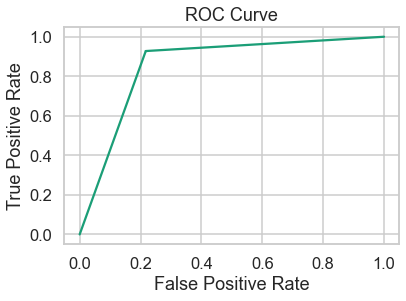

In [28]:

# Generate predictions on the test set
y_pred = dt_model.predict(X_test)

# Generate predicted probabilities for ROC AUC calculation
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC AUC:', roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Generating predictions on the test set using a Decision Tree model and calculates the classification report and ROC AUC score. It then plots the ROC curve using matplotlib.